In [13]:
import pandas as pd 
import numpy as np

In [35]:
df=pd.read_csv("modified_placement_data.csv")

In [36]:
print(df.head())

  cgpa     iq placement
0  6,8  123.0       Yes
1  5,9  106.0        No
2  5,3  121.0        No
3  7,4  132.0       Yes
4  5,8  142.0        No


In [37]:
df["cgpa"] = df["cgpa"].str.replace(",", ".").astype(float)
df["placement"] = df["placement"].map({"Yes": 1, "No": 0}).astype(int)



In [38]:
print(df.head())

   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [40]:
df.shape

(100, 3)

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [41]:
import matplotlib.pyplot as plt

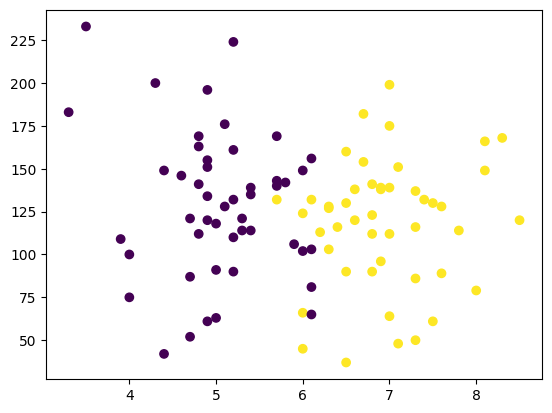

In [42]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [43]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [44]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [45]:
y


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [48]:
X_train

,cgpa,iq
36,5.7,140.0
56,6.1,65.0
65,8.1,166.0
79,6.5,90.0
93,6.8,112.0
...,...,...
72,7.3,116.0
55,7.8,114.0
37,8.1,149.0
6,5.7,143.0


In [49]:
X_test

,cgpa,iq
39,4.6,146.0
42,7.6,89.0
63,6.3,128.0
14,6.1,103.0
77,7.3,50.0
81,NaN,107.0
28,5.2,90.0
22,4.9,120.0
30,7.6,128.0
50,3.5,233.0


In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [51]:
X_test

array([[-0.94924515,  0.58340629],
       [ 1.24132058, -0.66675004],
       [ 0.29207543,  0.18862008],
       [ 0.14603772, -0.3596941 ],
       [ 1.02226401, -1.52212016],
       [        nan, -0.27196383],
       [-0.511132  , -0.64481747],
       [-0.73018858,  0.01315954],
       [ 1.24132058,  0.18862008],
       [-1.75245258,  2.49153963]])

In [52]:
y_test

39    0
42    1
63    1
14    0
77    1
81    0
28    0
22    0
30    1
50    0
Name: placement, dtype: int64

In [60]:
X_train

array([[-2.64531703e-01,  4.08988623e-01],
       [ 9.09327728e-02, -1.51348575e+00],
       [ 1.86825515e+00,  1.07544641e+00],
       [ 4.46397248e-01, -8.72660961e-01],
       [ 7.12995605e-01, -3.08735144e-01],
       [-1.15319289e+00, -1.84671465e+00],
       [ 8.01861724e-01,  3.57722640e-01],
       [-8.67994649e-02, -4.62533094e-01],
       [ 1.77938903e+00, -1.15462387e+00],
       [-1.15319289e+00, -7.80382191e-02],
       [-8.86594535e-01, -8.47027970e-01],
       [ 7.12995605e-01, -2.67722358e-02],
       [ 2.06665393e-03, -5.65065061e-01],
       [-5.31130059e-01,  3.83355631e-01],
       [-7.08862297e-01,  2.56215992e+00],
       [ 4.46397248e-01,  9.21648457e-01],
       [-7.08862297e-01, -3.60001128e-01],
       [ 4.46397248e-01, -2.23120952e+00],
       [-9.75460654e-01, -1.61601772e+00],
       [ 8.90727843e-01,  1.30614333e+00],
       [ 2.68665011e-01, -5.39432070e-01],
       [ 2.68665011e-01,  7.57597310e-02],
       [ 8.01861724e-01, -7.18863011e-01],
       [ 8.

In [82]:
import pandas as pd

# Convert to DataFrame (if not already)
X_train = pd.DataFrame(X_train)

# Drop NaN values and reset index
X_train.dropna(inplace=True)
X_train.reset_index(drop=True, inplace=True)

# Ensure y_train is a Series and matches X_train
y_train = pd.Series(y_train)

# Only keep indices that exist in X_train
y_train = y_train.iloc[:len(X_train)].reset_index(drop=True)

# Clean X_test similarly
X_test = pd.DataFrame(X_test)
X_test.dropna(inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Ensure y_test matches cleaned X_test
y_test = pd.Series(y_test)
y_test = y_test.iloc[:len(X_test)].reset_index(drop=True)


In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6666666666666666

In [93]:
y_train = y_train.values




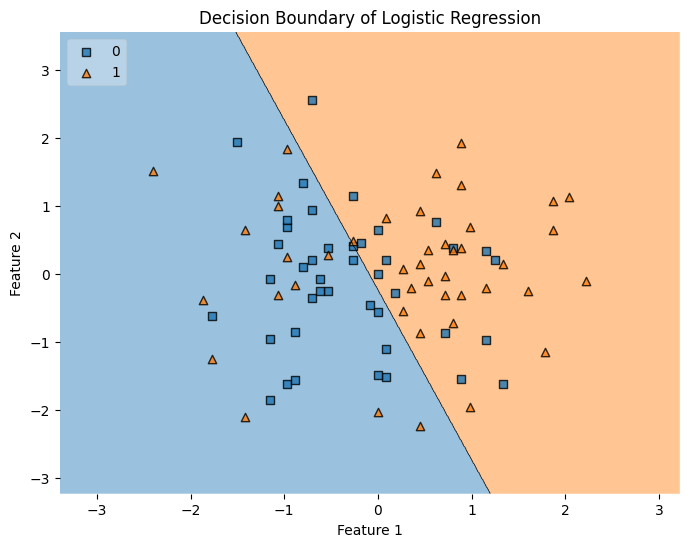

In [98]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# ✅ Sirf 2 features lein (mlxtend sirf 2D data ke liye kaam karta hai)
X_train_2D = X_train.iloc[:, :2].values  # Pehle 2 columns

# ✅ Model train karein
lr.fit(X_train_2D, y_train)  # y_train pehle se NumPy array hai

# ✅ Decision boundary plot karein
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_2D, y_train, clf=lr, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


In [99]:

import pickle
     

In [100]:
pickle.dump(lr,open('model.pkl','wb'))
